<br><br>
<font size = "6">
<b>Support Vector Machine</b>
</font>


# 1. Classification (Linear)

- Figure out, autonomously, which category (or class) an unknown item should be categorized into

- Number of categories / classes

    - Binary: 2 different classes
    
    - Multiclass: more than 2 classes
    
- Feature

    - The measurable parts that make up the unknown item (or the information you have available to categorize)

# 2. Distance from a Line

<br><br>
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2\end{bmatrix}, \, x = \begin{bmatrix}x_1\\x_2\end{bmatrix} \; \implies g(x) = \omega^Tx + \omega_0 = \omega_1x_1 + \omega_2x_2 + \omega_0$$

<br>
![h](./image_files/line_dist01.jpg)
<br>

- If $\vec p$ and $\vec q$ are on the decision line

<br>
$$\begin{align*} g\left(\vec p\right) = g\left(\vec q\right) = 0
& \implies \omega^T \vec p + \omega_0 = \omega^T \vec q + \omega_0 = 0 \\
& \implies \omega^T \left( \vec p- \vec q \right) = 0 \\ \\
& \therefore \, \omega : \text{normal to the line (orthogonal)}  \\
& \implies \text{tells the direction of the line}
\end{align*}$$

<br>
- If $x$ is on the line and $x = d\frac{\omega}{\lVert \omega \rVert}$ (where $d$ is a normal distance from the origin to the line)


<br>
$$ \begin{align*}  g(x)& = \omega^Tx + \omega_0 = 0 \;  \\
& \implies \omega^Td\frac{\omega}{\lVert \omega \rVert} + \omega_0 = d\frac{\omega^T\omega}{\lVert \omega \rVert} + \omega_0 = d\lVert \omega \rVert + \omega_0 = 0 \\
& \therefore d \, = - \frac{\omega_0}{\lVert \omega \rVert}
\end{align*}$$

- for any vector of $x$

$$ x = x_{\perp} + r \frac{\omega}{\lVert \omega \rVert}$$

$$ \omega^Tx = \omega^T \left( x_{\perp} + r \frac{\omega}{\lVert \omega \rVert}\right) = r \frac{\omega^T\omega}{\lVert \omega \rVert} = r \lVert \omega \rVert$$
<br>
$$ \begin{align*} g(x)
& = \omega^Tx + \omega_0 \\
& = r \lVert \omega \rVert + \omega_0 \qquad (r = d + h) \\
&  = (d +h) \lVert \omega \rVert + \omega_0 \\
& = \left(- \frac{\omega_0}{\lVert \omega \rVert} + h \right)\lVert \omega \rVert + \omega_0 \\
&  = h \lVert \omega \rVert
\end{align*}$$

$$\therefore \; h = \frac{g(x)}{\lVert \omega \rVert} \implies\; \mathbf{orthogonal \;distance \; from\; the\; line} $$

<br>
![h](./image_files/line_dist02.jpg)
<br>

<font size='4'><b>Another method to find a distance between $g(x) = -1$ and $g(x) = 1$</b></font>

$\text{suppose }\; g(x_1) = -1,\; g(x_2) = 1$

$$ \begin{array}{I}
\omega^Tx_1+\omega_0 = -1\\
\omega^Tx_2+\omega_0 = 1\\
\end{array}
\; \implies \; \omega^T(x_2 - x_1) = 2$$

<br>
$$s = \left\langle\frac{\omega}{\lVert \omega \rVert}, x_2 - x_1 \right\rangle = \frac{1}{\lVert \omega \rVert}\omega^T(x_2 - x_1) = \frac {2}{\lVert \omega \rVert}$$


<br>
![h](./image_files/line_dist04.jpg)
<br>

# 3. Illustrative Example

- Binary classification
    - $C_1$ and $C_2$


- Features
    - The coordinate of the unknown animal $i$ in the zoo


<br>
$$x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

<br>
![h](./image_files/SVM001.jpg)
<br>

- Is it possible to distinguish between $C_1$ and $C_2$ by its coordinates on a map of the zoo?


- We need to find a separating hyperplane (or a line in 2D)


<br>
$$ \omega_1x_1 + \omega_2x_2 + \omega_0 = 0 $$

$$ \begin{bmatrix}\omega_1 & \omega_2 \end{bmatrix}
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix} + \omega_0 = 0$$

$$ \omega^Tx + \omega_0 = 0$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

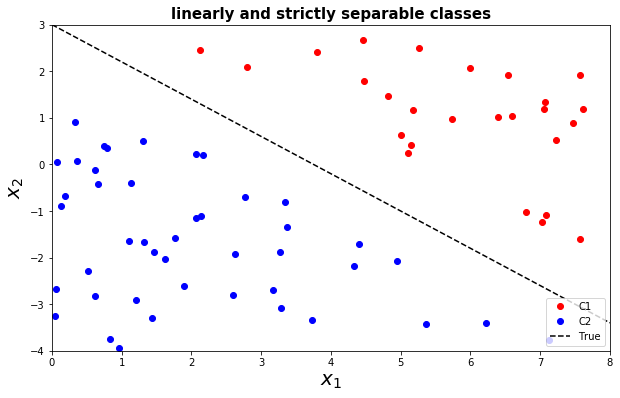

In [2]:
#training data gerneration
x1 = 8*np.random.rand(100, 1)
x2 = 7*np.random.rand(100, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]

xp = np.linspace(0,8,100).reshape(-1,1)
ypt = -0.8*xp + 3

plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(xp, ypt, '--k', label='True')
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()


- Given:
    - Hyperplane defined by $\omega$ and $\omega_0$
    - Animals coordinates (or features) $x$   
<br>
- Decision making:

$$ \omega^Tx + \omega_0 >0 \implies x \; \text{belongs to} \; C_1$$

$$ \omega^Tx + \omega_0 <0 \implies x \; \text{belongs to} \; C_2$$



- Find $\omega$ and $\omega_0$ such that $x$ given $\omega^Tx + \omega_0 = 0$

    or


- Find $\omega$ and $\omega_0$ such that $x\in C_1$ given $\omega^Tx + \omega_0 >1$ and $x\in C_2$ given $\omega^Tx + \omega_0 < -1$


<br>
$$ 
\begin{align*}
\;&\omega^Tx + \omega_0 > b \\ 
\Longleftrightarrow \;&\frac{\omega^T}{b}x + \frac{\omega_0}{b} > 1 \\
\Longleftrightarrow \;&\omega'^Tx + \omega'_0 > 1
\end{align*}$$


- Same problem if strictly separable

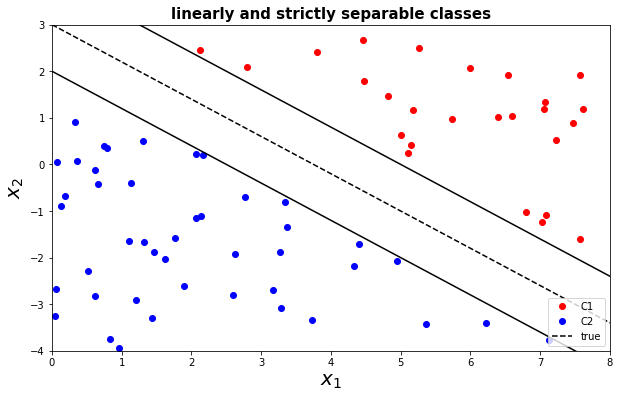

In [3]:
#  see how data are generated
xp = np.linspace(0,8,100).reshape(-1,1)
ypt = -0.8*xp + 3

plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(xp, ypt, '--k', label='true')
plt.plot(xp, ypt-1, '-k')
plt.plot(xp, ypt+1, '-k')
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

## 3.1. LP Formulation 1  
- $n \;(=2)$ features

- $m = N + M$ data points in training set

<br>
$$ x^{(i)} = \begin{bmatrix} x^{(i)}_1 \\ x^{(i)}_2 \end{bmatrix} \;\text{with}\; \omega = \begin{bmatrix} \omega_1 \\ \omega_2 \end{bmatrix}\qquad \text{or} \qquad x^{(i)} = \begin{bmatrix} 1 \\ x^{(i)}_1 \\ x^{(i)}_2 \end{bmatrix}  \;\; \text{with}\; \omega = \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2 \end{bmatrix}$$

- $N$ belongs to $C_1$ in training set

- $M$ belongs to $C_2$ in training set
<br>
- $\omega$ and $\omega_0$ are the unknown variables

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$\begin{align*} \text{minimize} \quad
& \text{something} \\ \\
\text{subject to} \quad
& \begin{cases}
\omega^Tx^{(1)} + \omega_0 \geq1\\
\omega^Tx^{(2)} + \omega_0 \geq1\\
 \quad  \quad \vdots \\
\omega^Tx^{(N)} + \omega_0 \geq1\\
\end{cases} \\
& \begin{cases}
\omega^Tx^{(N+1)} + \omega_0 \leq{-1}\\
\omega^Tx^{(N+2)} + \omega_0 \leq{-1}\\
 \quad  \quad \vdots \\
\omega^Tx^{(N+M)} + \omega_0 \leq{-1}\\
\end{cases} \end{align*}$$
        </td>
        <td width = 40%>
$$\begin{align*} \text{minimize} \quad
& \text{something} \\ \\
\text{subject to} \quad
& \begin{cases}
\omega^Tx^{(1)} \geq1\\
\omega^Tx^{(2)} \geq1\\
 \quad  \quad \vdots \\
\omega^Tx^{(N)} \geq1\\
\end{cases} \\
& \begin{cases}
\omega^Tx^{(N+1)} \leq{-1}\\
\omega^Tx^{(N+2)} \leq{-1}\\
 \quad  \quad \vdots \\
\omega^Tx^{(N+M)} \leq{-1}\\
\end{cases} \end{align*}$$
        </td>
    </tr>
</table>

<font size='4'><b>Code (CVXPY)</b></font>


<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$
\begin{align*} &X_1 = \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \vdots \\ \left(x^{(N)}\right)^T\end{bmatrix} =
\begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ 
\vdots & \vdots \\ x_1^{(N)} & x_2^{(N)} \\ 
\end{bmatrix}\\
&X_2 = \begin{bmatrix} \left(x^{(N+1)}\right)^T \\ \left(x^{(N+2)}\right)^T \\ \vdots \\ \left(x^{(N+M)}\right)^T\end{bmatrix} =
\begin{bmatrix} x_1^{(N+1)} & x_2^{(N+1)} \\ x_1^{(N+2)} & x_2^{(N+2)} \\ 
\vdots & \vdots \\ x_1^{(N+M)} & x_2^{(N+M)} \\ 
\end{bmatrix}\end{align*}$$
        </td>
        <td width = 40%>
$$
\begin{align*} &X_1 = \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \vdots \\ \left(x^{(N)}\right)^T\end{bmatrix} =
\begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 
\vdots & \vdots & \vdots \\ 1 & x_1^{(N)} & x_2^{(N)} \\ 
\end{bmatrix}\\
&X_2 = \begin{bmatrix} \left(x^{(N+1)}\right)^T \\ \left(x^{(N+2)}\right)^T \\ \vdots \\ \left(x^{(N+M)}\right)^T\end{bmatrix} =
\begin{bmatrix} 1 & x_1^{(N+1)} & x_2^{(N+1)} \\ 1 & x_1^{(N+2)} & x_2^{(N+2)} \\ 
\vdots & \vdots & \vdots \\ 1 & x_1^{(N+M)} & x_2^{(N+M)} \\ 
\end{bmatrix}\end{align*}$$
        </td>
    </tr>
</table>

<br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$\begin{align*} \text{minimize} \quad
& \text{something} \\
\text{subject to} \quad 
& X_1\omega + \omega_0 \geq 1 \\
& X_2\omega + \omega_0 \leq -1
\end{align*}$$
        </td>
        <td width = 40%>
$$\begin{align*} \text{minimize} \quad
& \text{something} \\
\text{subject to} \quad 
& X_1\omega \geq 1 \\
& X_2\omega \leq -1
\end{align*}$$
        </td>
    </tr>
</table>



<font size='4'><b>Form 1</b></font>

$$\begin{align*} \text{minimize} \quad
& \text{something} \\
\text{subject to} \quad 
& X_1\omega + \omega_0 \geq 1 \\
& X_2\omega + \omega_0 \leq -1
\end{align*}$$

In [4]:
# CVXPY using simple classification
import cvxpy as cvx

X1 = np.hstack([x1[C1], x2[C1]])
X2 = np.hstack([x1[C2], x2[C2]])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

N = X1.shape[0]
M = X2.shape[0]

In [5]:
w = cvx.Variable(2,1)
w0 = cvx.Variable(1,1)

obj = cvx.Minimize(1)
const = [X1*w + w0 >= 1, X2*w + w0 <= -1]
prob = cvx.Problem(obj, const).solve()

w = w.value
w0 = w0.value

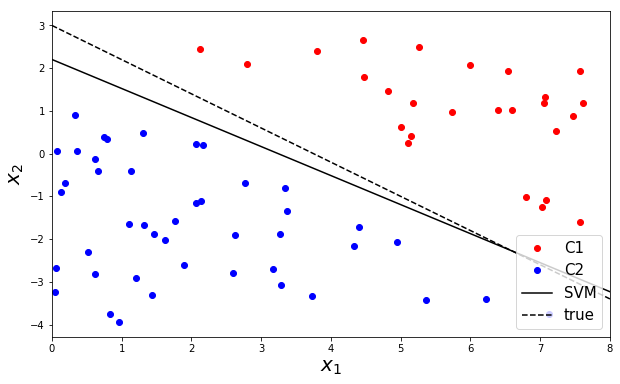

In [6]:
xp = np.linspace(0,8,100).reshape(-1,1)
yp = - w[0,0]/w[1,0]*xp - w0/w[1,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,0], X1[:,1], 'ro', label='C1')
plt.plot(X2[:,0], X2[:,1], 'bo', label='C2')
plt.plot(xp, yp, 'k', label='SVM')
plt.plot(xp, ypt, '--k', label='true')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()

<font size='4'><b>Form 2</b></font>

$$\begin{align*} \text{minimize} \quad
& \text{something} \\
\text{subject to} \quad 
& X_1\omega \geq 1 \\
& X_2\omega \leq -1
\end{align*}$$

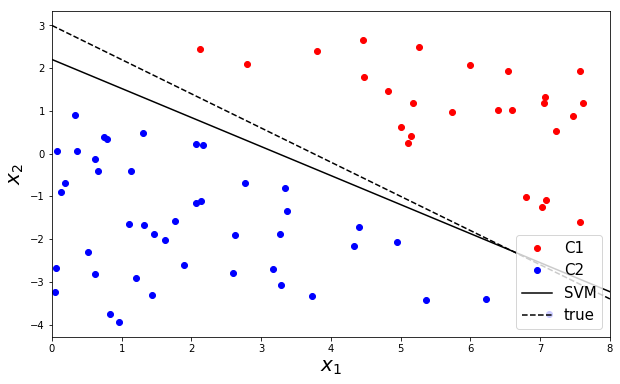

In [7]:
N = C1.shape[0]
M = C2.shape[0]

X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([M,1]), x1[C2], x2[C2]])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

w = cvx.Variable(3,1)
obj = cvx.Minimize(1)
const = [X1*w >= 1, X2*w <= -1]
prob = cvx.Problem(obj, const).solve()

w = w.value

xp = np.linspace(0,8,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, 'k', label='SVM')
plt.plot(xp, ypt, '--k', label='true')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()

## 3.2. Outlier

- Note that in the real world, you may have noise, errors, or outliers that do not accurately represent the actual phenomena


- Non-separable case


- No solutions (hyperplane) exist
    - We will allow some training examples to be misclassified !
    - but we want their number to be minimized

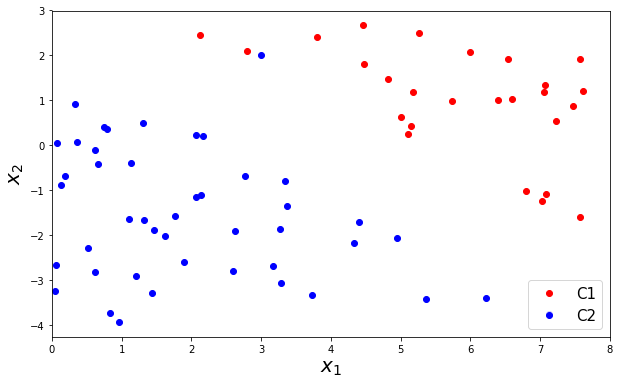

In [8]:
X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([M,1]), x1[C2], x2[C2]])

outlier = np.array([1, 3, 2]).reshape(-1,1)
X2 = np.vstack([X2, outlier.T])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()

In [9]:
w = cvx.Variable(3,1)
obj = cvx.Minimize(1)
const = [X1*w >= 1, X2*w <= -1]
prob = cvx.Problem(obj, const).solve()

print(w.value)

None


## 3.3. LP Formulation 2

- $n \;(=2)$ features

- $m = N+M$ data points in a training set

$$x^i = \begin{bmatrix} x_1^{(i)} \\ x_2^{(i)} \end{bmatrix}$$

- $N$ belongs to $C_1$ in training set

- $M$ belongs to $C_2$ in training set
<br>
- $\omega$ and $\omega_0$ are the variables (unknown)


- For the non-separable case, we <font color='green'>relex</font> the above constraints

- <font color='red'>Need slack variables $u$ and $\upsilon$ where all are positive</font>


__The optimization problem for the non-separable case__


<br>
$$\begin{align*} \text{minimize} \quad & \sum\limits_{i=1}^{N}u_i + \sum\limits_{i=1}^{M}\upsilon_i \\ \\
\text{subject to} \quad
& \begin{cases}
\omega^Tx^{(1)} + \omega_0 \geq1-u_1\\
\omega^Tx^{(2)} + \omega_0 \geq1-u_2\\
 \quad  \quad \vdots \\
\omega^Tx^{(N)} + \omega_0 \geq1-u_N\\
\end{cases} \\
& \begin{cases}
\omega^Tx^{(N+1)} + \omega_0 \leq{-(1-\upsilon_1)}\\
\omega^Tx^{(N+2)} + \omega_0 \leq{-(1-\upsilon_2)}\\
 \quad  \quad \vdots \\
\omega^Tx^{(N+M)} + \omega_0 \leq{-(1-\upsilon_M)}\\
\end{cases} \\
& \begin{cases}
u \geq 0\\
v \geq 0\\
\end{cases}
\end{align*}$$

- Expressed in a matrix form


<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$
\begin{align*} X_1 &= \begin{bmatrix} x^{(1)^T} \\ x^{(2)^T} \\ \vdots \\ x^{(N)^T}\end{bmatrix} =
\begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ 
\vdots & \vdots \\ x_1^{(N)} & x_2^{(N)} \\ 
\end{bmatrix}\\
X_2 &= \begin{bmatrix} x^{(N+1)^T} \\ x^{(N+2)^T} \\ \vdots \\ x^{(N+M)^T}\end{bmatrix} =
\begin{bmatrix} x_1^{(N+1)} & x_2^{(N+1)} \\ x_1^{(N+2)} & x_2^{(N+2)} \\ 
\vdots & \vdots \\ x_1^{(N+M)} & x_2^{(N+M)} \\ 
\end{bmatrix} \\
u &= \begin{bmatrix} 
u_1\\
\vdots\\
u_N\\
\end{bmatrix}\\
\upsilon &= \begin{bmatrix} 
\upsilon_{1}\\
\vdots\\
\upsilon_{M}\\
\end{bmatrix}
\end{align*}$$
        </td>
        <td width = 40%>
$$
\begin{align*} X_1 &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \vdots \\ \left(x^{(N)}\right)^T\end{bmatrix} =
\begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 
\vdots & \vdots & \vdots \\ 1 & x_1^{(N)} & x_2^{(N)} \\ 
\end{bmatrix}\\
X_2 &= \begin{bmatrix} \left(x^{(N+1)}\right)^T \\ \left(x^{(N+2)}\right)^T \\ \vdots \\ \left(x^{(N+M)}\right)^T\end{bmatrix} =
\begin{bmatrix} 1 & x_1^{(N+1)} & x_2^{(N+1)} \\ 1 & x_1^{(N+2)} & x_2^{(N+2)} \\ 
\vdots & \vdots & \vdots \\ 1 & x_1^{(N+M)} & x_2^{(N+M)} \\ 
\end{bmatrix} \\
u &= \begin{bmatrix} 
u_1\\
\vdots\\
u_N\\
\end{bmatrix}\\
\upsilon &= \begin{bmatrix} 
\upsilon_{1}\\
\vdots\\
\upsilon_{M}\\
\end{bmatrix}
\end{align*}$$
        </td>
    </tr>
</table>


<br><br>
<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$\begin{align*} \text{minimize} \quad  & 1^Tu + 1^T\upsilon \\
\text{subject to} \quad
& X_1\omega + \omega_0 \geq 1-u \\
& X_2\omega + \omega_0 \leq -(1-\upsilon) \\
& u \geq 0 \\
& \upsilon \geq 0
\end{align*}$$
        </td>
        <td width = 40%>
$$\begin{align*} \text{minimize} \quad  & 1^Tu + 1^T\upsilon \\
\text{subject to} \quad
& X_1\omega \geq 1-u \\
& X_2\omega \leq -(1-\upsilon) \\
& u \geq 0 \\
& \upsilon \geq 0
\end{align*}$$
        </td>
    </tr>
</table>

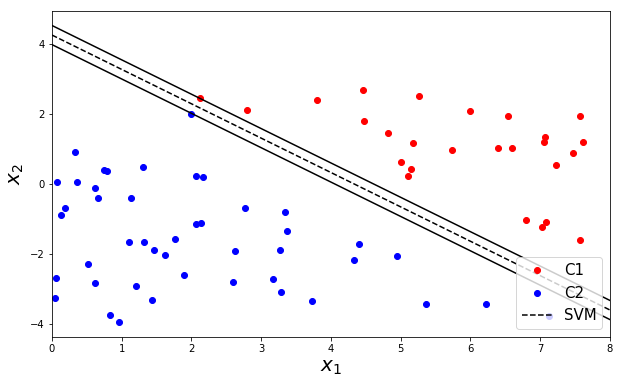

In [10]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([C2.shape[0],1]), x1[C2], x2[C2]])

outlier = np.array([1, 2, 2]).reshape(-1,1)
X2 = np.vstack([X2, outlier.T])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

N = X1.shape[0]
M = X2.shape[0]

w = cvx.Variable(3,1)
u = cvx.Variable(N,1)
v = cvx.Variable(M,1)
obj = cvx.Minimize(np.ones((1,N))*u + np.ones((1,M))*v)
const = [X1*w >= 1-u, X2*w <= -(1-v), u >= 0, v >= 0 ]
prob = cvx.Problem(obj, const).solve()

w = w.value

xp = np.linspace(0,8,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, '--k', label='SVM')
plt.plot(xp, yp-1/w[2,0], '-k')
plt.plot(xp, yp+1/w[2,0], '-k')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()

<font size='4'><b>Further improvement</b></font>

- Notice that hyperplane is not as accurately represent the division due to the outlier


- Can we do better when there are noise data or outliers?


- Yes, but we need to look beyond LP


- Idea: large margin leads to good generalization on the test data

## 3.4. Maximize Margin (Finally, it is Support Vector Machine)

- Distance (= margin)

$$\text{margin} = \frac{2}{\lVert \omega \rVert _2}$$


- Minimize $\lVert \omega \rVert_2$ to maximize the margin
<br><br>
- Multiple objectives


- Use gamma ($\gamma$) as a weighting betwwen the followings:
    - Bigger margin given robustness to outliers
    - Hyperplane that has few (or no) errors


<br><br>
$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^Tu + 1^T\upsilon) \\
\text{subject to} \quad
& X_1\omega + \omega_0 \geq 1-u \\
& X_2\omega + \omega_0 \leq -(1-\upsilon) \\
& u \geq 0 \\
& \upsilon \geq 0
\end{align*}$$



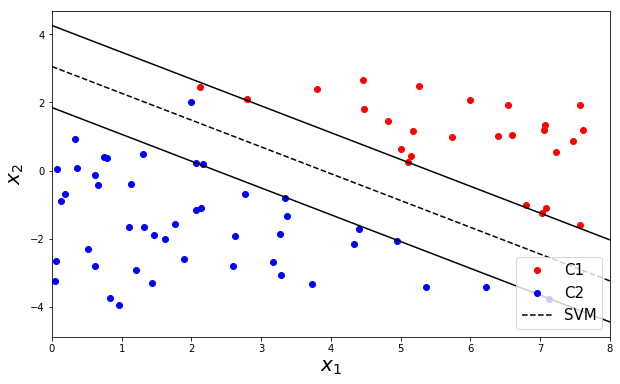

In [11]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([C2.shape[0],1]), x1[C2], x2[C2]])

outlier = np.array([1, 2, 2]).reshape(-1,1)
X2 = np.vstack([X2, outlier.T])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

N = X1.shape[0]
M = X2.shape[0]

g = 1
w = cvx.Variable(3,1)
u = cvx.Variable(N,1)
v = cvx.Variable(M,1)
obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones((1,N))*u + np.ones((1,M))*v))
const = [X1*w >= 1-u, X2*w <= -(1-v), u >= 0, v >= 0 ]
prob = cvx.Problem(obj, const).solve()

w = w.value

xp = np.linspace(0,8,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, '--k', label='SVM')
plt.plot(xp, yp-1/w[2,0], '-k')
plt.plot(xp, yp+1/w[2,0], '-k')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()

# 4. Support Vector Machine

- Probably the most popular/influential classification algorithm


- A hyperplane based classifier (like the Perceptron)


- Additionally uses the maximum margin principle
    - maximize distance (margin) of closest samples from the decision line
    <br><br>
    $$ \text{maximize {minimum distance}} $$
    <br>
    - note: perceptron only utilizes a sign of distance
    - Finds the hyperplane with maximum separation margin on the training data

<br>
$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^Tu + 1^T\upsilon) \\
\text{subject to} \quad
& X_1\omega + \omega_0 \geq 1-u \\
& X_2\omega + \omega_0 \leq -(1-\upsilon) \\
& u \geq 0 \\
& \nu \geq 0
\end{align*}$$

- In a more compact form

<br>
<table style="border-style: hidden; border-collapse: collapse;" width = "50%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 20% style="border-style: hidden; border-collapse: collapse;">
             $$\begin{align*}\omega^T x_n + \omega_0 &\geq 1 \;\text{for }\; y_n = +1\\
                \omega^T x_n + \omega_0 &\leq -1 \;\text{for }\; y_n = -1 \end{align*}$$
        </td>
        <td width = 10% style="border-style: hidden; border-collapse: collapse;">
             $$ \Longleftrightarrow $$
        </td>
        <td width = 20%>
            $$y_n\left( \omega^T x_n + \omega_0 \right) \geq 1$$
        </td>
    </tr>
</table>

<br>
$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^T \xi) \\
\text{subject to} \quad
& y_n\left( \omega^T x_n + \omega_0 \right) \geq 1 - \xi_n \\
& \xi \geq 0 \\
\end{align*}$$



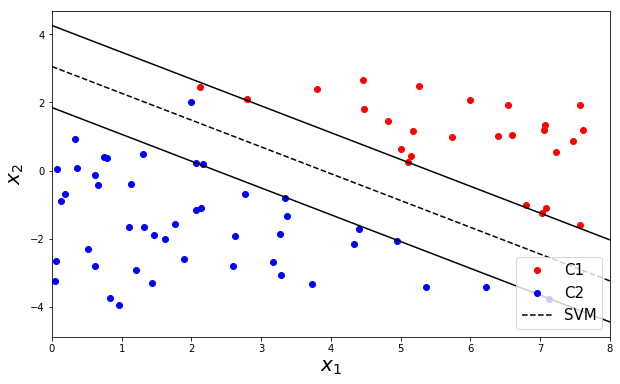

In [12]:
# SVM in a compact form

X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([C2.shape[0],1]), x1[C2], x2[C2]])

outlier = np.array([1, 2, 2]).reshape(-1,1)
X2 = np.vstack([X2, outlier.T])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

N = X1.shape[0]
M = X2.shape[0]

m = N + M
X = np.vstack([X1, X2])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

g = 1
w = cvx.Variable(3,1)
d = cvx.Variable(m,1)
obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones([1,m])*d))
const = [cvx.mul_elemwise(y, X*w) >= 1-d, d >= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value

xp = np.linspace(0,8,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, '--k', label='SVM')
plt.plot(xp, yp-1/w[2,0], '-k')
plt.plot(xp, yp+1/w[2,0], '-k')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()

# 5. Nonlinear Support Vector Machine 

## 5.1. Kernel
- Often we want to capture nonlinear patterns in the data
    - nonlinear regression: input and output relationship may not be linear
    - nonlinear classification: classes may note be separable by a linear boundary


- Linear models (e.g. linear regression, linear SVM) are note just rich enough


- Kernels: make linear model work in nonlinear settings
    - by mapping data to higher dimensions where it exhibits linear patterns
    - apply the linear model in the new input feature space
    - mapping $=$ changing the feature representation


- Note: such mappings can be expensive to compute in general
    - Kernels give such mappings for (almost) free
    - in most cases, the mappings need not be even computed
    - using the Kernel trick !

## 5.2. Classifying non-linear separable data
- Consider the binary classification problem
    - each example represented by a single feature $x$
    - No linear separator exists for this data

<center><img src="./image_files/nonlinear_1D.png", width = 300></center>

- Now map each example as $x \rightarrow \{x,x^2\}$


- Data now becomes linearly separable in the new representation

<center><img src="./image_files/linear_2D.png", width = 300></center>

- Linear in the new representation $=$ nonlinear in the old representation

- Let's look at another example
    - Each example defined by a two features $x=\{x_1, x_2\}$
    - No linear separator exists for this data

<center><img src="./image_files/nonlinear_2D.png", width = 300></center>

- Now map each example as $x=\{x_1, x_2\} \rightarrow z=\{x_1^2,\sqrt{2}x_1x_2,x_2^2\}$
    - Each example now has three features (derived from the old represenation)


- Data now becomes linear separable in the new representation

<center><img src="./image_files/linear_3D.png", width = 300></center>

In [2]:
%%html
<center><iframe 
width="420" height="315" src="https://www.youtube.com/embed/3liCbRZPrZA?rel=0" frameborder="0" allowfullscreen>
</iframe></center>

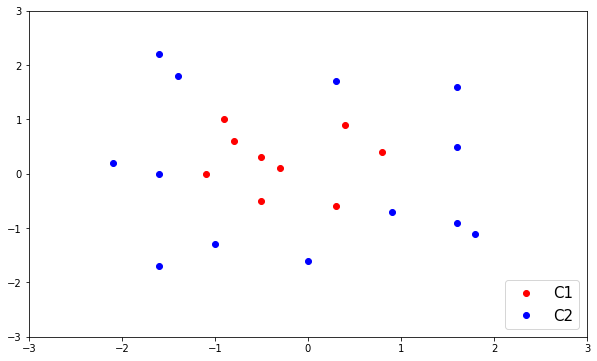

In [14]:
X1 = np.array([[-1.1,  0], [-0.3,  0.1], [-0.9,  1],[0.8,  0.4],[0.4,  0.9],[0.3,-0.6],[-0.5, 0.3],
        [-0.8,  0.6],[-0.5, -0.5]])
     
X2 = np.array([[-1,  -1.3], [-1.6 , 2.2],  [0.9, -0.7],[1.6,  0.5],[1.8, -1.1],[1.6,  1.6],[-1.6, -1.7],
        [-1.4,  1.8],[1.6, -0.9],[0, -1.6],[0.3, 1.7],[-1.6 , 0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

plt.figure(figsize=(10, 6))
plt.plot(X1[:, 0], X1[:,1], 'ro', label='C1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='C2')
plt.axis([-3,3,-3,3])
plt.legend(loc = 4, fontsize = 15)
plt.show()

In [15]:
N = X1.shape[0]
M = X2.shape[0]

X = np.vstack([X1, X2])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

m = N + M
Z = np.hstack([np.ones([m,1]), np.square(X[:,0]), np.sqrt(2)*np.multiply(X[:,0],X[:,1]), np.square(X[:,1])])

In [16]:
g = 1
w = cvx.Variable(4, 1)
d = cvx.Variable(m, 1)

obj = cvx.Minimize(cvx.norm(w, 2) + g*np.ones([1,m])*d)
const = [cvx.mul_elemwise(y, Z*w) >= 1-d, d>=0]
prob = cvx.Problem(obj, const).solve()

w = w.value
print(w)

[[ 2.08736995]
 [-1.20600389]
 [-0.17476429]
 [-1.20600389]]


In [17]:
# to plot
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))

test_X = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
test_X = np.asmatrix(test_X)

m = test_X.shape[0]
test_Z  = np.hstack([np.ones([m,1]), np.square(test_X[:,0]), \
                     np.sqrt(2)*np.multiply(test_X[:,0],test_X[:,1]), np.square(test_X[:,1])])
q = test_Z*w

In [18]:
B = []
for i in range(m):
    if q[i,0] > 0:
        B.append(test_X[i,:])       

#B = np.array(B).reshape(-1,2)
B = np.vstack(B)

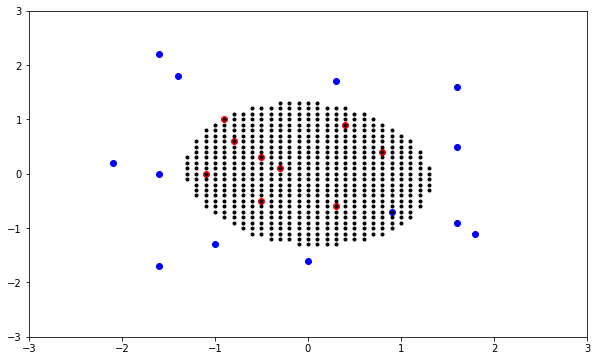

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.plot(B[:,0], B[:,1], 'k.')
plt.axis([-3, 3, -3, 3])
plt.show()

In [20]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>